# Life Expectancy
- Questions to be answered
1. Does various predicting factors which has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How do Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have a positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on Life Expectancy?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Shubham Dandak\Downloads\Life Expectancy Data.csv")

In [3]:
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2048,Poland,2006,Developed,75.2,144.0,2,10.40,9.145556,98.0,120,...,99.0,6.17,99.0,0.1,94.772600,38141267.0,2.3,2.4,0.803,15.0
2572,Thailand,2012,Developing,74.3,154.0,9,6.56,801.050465,98.0,5197,...,99.0,4.17,99.0,0.1,5859.915622,67843979.0,8.0,8.1,0.729,13.7
202,Bangladesh,2005,Developing,67.8,155.0,174,0.01,38.054620,45.0,25934,...,94.0,2.68,93.0,0.1,484.155471,14343111.0,19.9,2.5,0.499,8.2
2019,Peru,2003,Developing,72.1,152.0,15,4.50,34.703335,65.0,0,...,95.0,4.60,94.0,0.4,218.259970,26937738.0,1.3,1.3,0.686,13.3
1355,Kazakhstan,2006,Developing,65.0,295.0,8,7.08,76.198689,99.0,109,...,99.0,3.73,99.0,0.1,5291.575650,153884.0,2.4,2.5,0.747,14.3
1376,Kenya,2001,Developing,51.9,434.0,77,1.63,3.847603,NaN,11304,...,77.0,4.62,8.0,16.9,41.776361,32321482.0,9.0,9.0,0.447,8.4
2286,Seychelles,2010,Developing,72.4,18.0,0,6.51,16.492323,99.0,0,...,99.0,3.59,99.0,0.1,184.684470,8977.0,5.8,6.2,0.740,13.2
140,Austria,2003,Developed,78.8,88.0,0,12.20,504.430874,83.0,90,...,84.0,1.48,84.0,0.1,3212.935500,8121423.0,1.7,1.9,0.837,14.7
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0
610,Congo,2013,Developing,63.9,274.0,7,0.01,0.000000,85.0,124,...,85.0,5.90,85.0,3.0,NaN,NaN,7.7,7.4,0.576,11.1


#### Understanding data and preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df['Status'] = df['Status'].replace({'Developing':1, 'Developed':0})

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df_heat = df.drop(['Country'],axis=1)
corr = df_heat.corr()

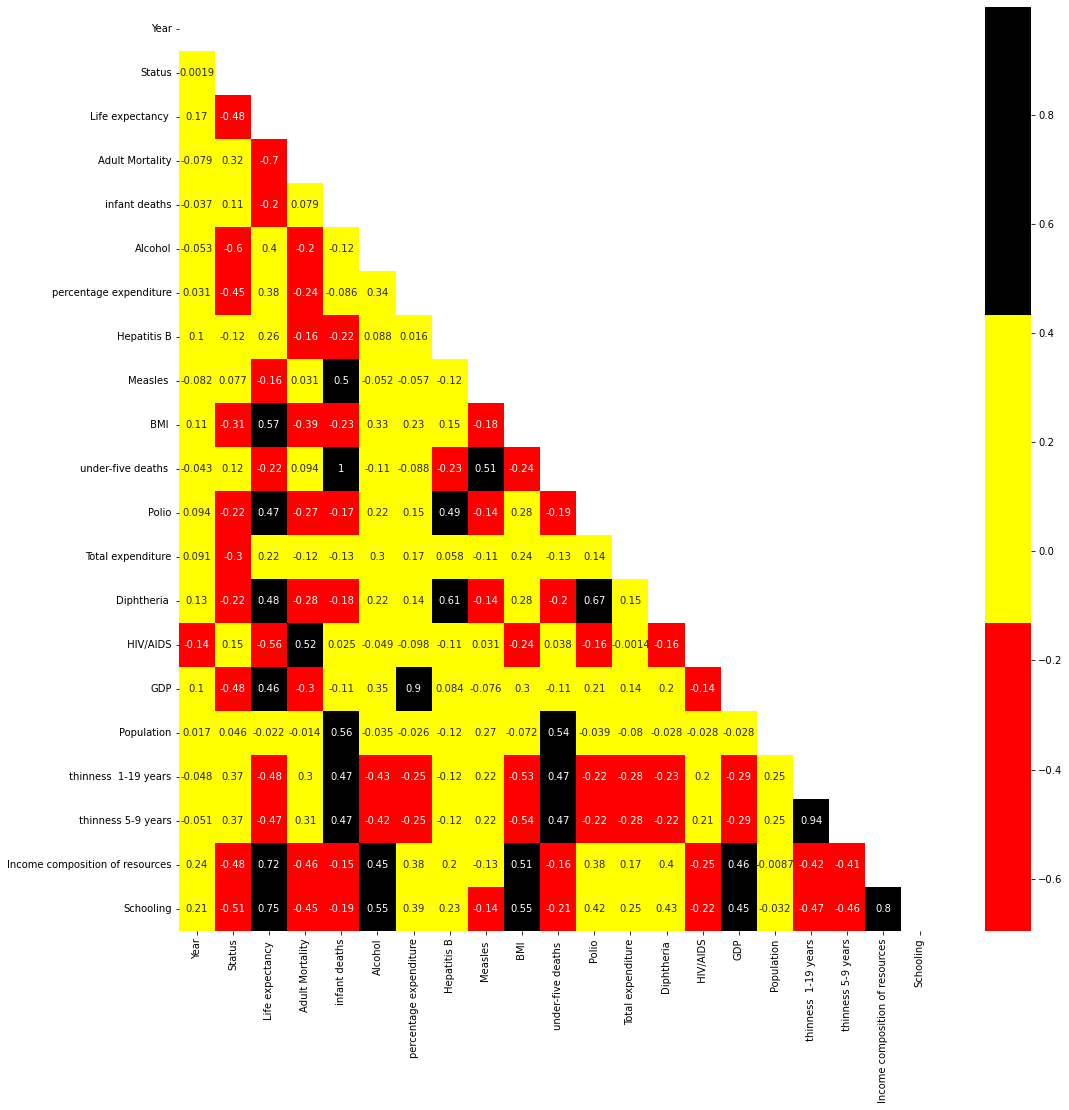

In [8]:
# Finding correlation among variables
color = ['red','yellow','black']
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(17,17))
sns.heatmap(corr, cmap=color, mask=mask, annot=True)
plt.show()

## Question: 1
###### Does various predicting factors which has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting life expectancy?

### Inference 1-

- The predicting factors choosen have different relation with Life Expectancy 
##### Strong positive correlation with life expectancy:
1. Schooling = 75% 
2. Income composition of resources = 72% 
3. BMI = 57%
4. Diptheria = 48%
5. Polio = 47%
6. GDP = 46%

##### Positive correlation with life expectancy:
1. Alcohol = 40%
2. Percentage expenditue = 38%
3. Hepatitis B = 26%
4. Total expenditure = 22%

##### Negative correlation with life expectancy:
1. Adult mortality = -70%
2. HIV/AIDS = -56%
3. Status = -48%
4. Thinness 5-19 years = -48%
5. Infant deaths = -20%
6. Population = -2%

## Question 2:
###### Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df_developing= df[df['Status']=='Developing']
df_developed= df[df['Status']=='Developed']

In [11]:
df[df['Life expectancy']<65]['Status'].value_counts()

1    851
Name: Status, dtype: int64

In [12]:
df[df['Life expectancy']>65]['Status'].value_counts()

1    1552
0     512
Name: Status, dtype: int64

In [13]:
df[df['Life expectancy']==65]['Status'].value_counts()

1    13
Name: Status, dtype: int64

In [14]:
df_c = df[df['Life expectancy']<65]['Country']
df_c.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Burkina Faso',
       'Burundi', "Côte d'Ivoire", 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Democratic Republic of the Congo', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq',
       'Kazakhstan', 'Kenya', 'Kiribati',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mongolia',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'Pakistan', 'Papua New Guinea', 'Russian Federation', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Syrian Arab Republic', 'Tajikistan', 'Timor-Leste', 'Togo',
       'Turkmenistan', 'Uganda', 'United Republic

### Inference 2-
###### All the countries in given dataset with life expectancy below 65 years are developing countries
- Common observation among this countries:
1. This countries have lower Total expenditure on health compared to developed nations,
2. The income composition in this countries is also lower than that of developed countries.

So Government need to increase the expenditure on healthcare so that the life expectancy can be enhanced in this countries where life expectancy is below 65 years. 

## Question 3: 
###### How do Infant and Adult mortality rates affect life expectancy?

In [15]:
df_mor = df[['infant deaths','under-five deaths','Adult Mortality','Life expectancy']]

In [16]:
corr_mor = df_mor.corr()
corr_mor

,infant deaths,under-five deaths,Adult Mortality,Life expectancy
infant deaths,1.000000,0.996629,0.078756,-0.196557
under-five deaths,0.996629,1.000000,0.094146,-0.222529
Adult Mortality,0.078756,0.094146,1.000000,-0.696359
Life expectancy,-0.196557,-0.222529,-0.696359,1.000000


### Inference 3-
- The life expectancy is negatively correlated with infant mortality, under-five deaths and adult mortality
1. Infant deaths = -16%
2. Adult mortality = -70%

###### That means life expectancy is inversely proportional with infant and adult mortality.
The countries with lower Life Expectancy have -
- Higher Infant mortality
- Higher adult mortality
- Developing status

So as infant deaths and adult mortality increases life expectancy decreases and vice versa.

## Question 4:
###### Does Life Expectancy has a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?


### Inference 4:
##### Alcohol
- From available dataset we can infer that alcohol consumption is more in developed countries, and life expectancy is also high in developed countries. So for this countries alcohol consumption is not impacting much to life expectancy. And from heatmap too we can observe alcohol has 40% positive correlation with Life Expectancy.


#####  Eating habits
- Although Eating habits is not a direct column in our dataset but we are having related columns like Income composition of resources, BMI tells us indirectly about eating habits i.e. with increase in income eating habit generally increase. Apart from this quality of eating habit i.e. healthy food or junk food is related to BMI,

    - Healthy food keeps BMI in optimum range
    - Junk food distort BMI and leads to distorted BMI

- In developed countries because of good income, people can afford food and comparatively healthy population,
- In developing countries especially poor developing countries under nurishment, Child Stunting, Child wasting is commonly visible and that is because the people there do not have access of healthy food.


##### Life style and exercise
- Lifestyle and Exercise are positively correlated with Life Expectancy when life style is active and people do physical exercise and it becomes negatively related when sluggish lifestyle and no physical exercise is there.


###### Smoking
- Smoking has negative correlation with Life Expectancy, i.e. smoking increases health related risks and which reduces Life Expectancy.

# Question 5:
#### What is the impact of schooling on the lifespan of humans?

In [17]:
df_sch = df[['Life expectancy', 'Schooling']]

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>

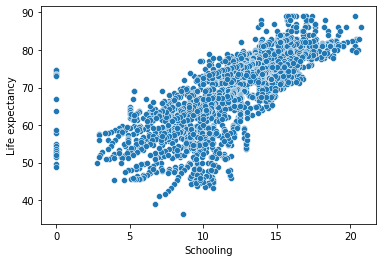

In [18]:
sns.scatterplot(data=df_sch, x=df['Schooling'], y=df['Life expectancy'],
               palette=['red','black'])

### Inference 5: 
Education has potential to change the living standard of people directly, and it can be seen from our dataset too.

- Schooling and life expectancy are highly positive correlated i.e. 75%. Means Schooling increases life expectancy at a large extent.
- The scatterplot also gives us the correlation among Life Expectancy and Schooling ie. Life Expectancy is really high in those countries where schooling is also high.

# Question 6:
###### Does Life Expectancy have a positive or negative relationship with drinking alcohol?

### Inference 6:
Although a general perception states that consumption of alchohol has injurious effect on one's health.

###### But in given dataset the consumption of alchohol has 40% correlation with Life expectancy and in developed countries consumption of alchohol is not affecting the Life Expectancy.

# Question 7:
#### Do densely populated countries tend to have lower life expectancy?

In [20]:
df['Population'].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

In [21]:
df['Population'].median()

1386542.0

In [22]:
df['Population'].mean()

12753375.120052498

In [24]:
df_2 = df[df['Population']>1386542]

In [28]:
df_2[df_2['Status']==0].nunique()

Country                             21
Year                                16
Status                               1
Life expectancy                     91
Adult Mortality                     97
infant deaths                        5
Alcohol                            156
percentage expenditure             190
Hepatitis B                         26
Measles                            112
BMI                                108
under-five deaths                    6
Polio                               17
Total expenditure                  164
Diphtheria                          17
HIV/AIDS                             1
GDP                                203
Population                         203
thinness  1-19 years                36
thinness 5-9 years                  42
Income composition of resources    132
Schooling                           56
dtype: int64

In [29]:
df_2[df_2['Status']==1].nunique()

Country                             91
Year                                16
Status                               1
Life expectancy                    317
Adult Mortality                    349
infant deaths                      175
Alcohol                            513
percentage expenditure             857
Hepatitis B                         79
Measles                            522
BMI                                409
under-five deaths                  210
Polio                               67
Total expenditure                  495
Diphtheria                          74
HIV/AIDS                           149
GDP                                925
Population                         940
thinness  1-19 years               170
thinness 5-9 years                 174
Income composition of resources    455
Schooling                          138
dtype: int64

In [30]:
df[df['Status']==0].nunique()

Country                             32
Year                                16
Status                               1
Life expectancy                    121
Adult Mortality                    133
infant deaths                       11
Alcohol                            357
percentage expenditure             421
Hepatitis B                         33
Measles                            193
BMI                                194
under-five deaths                   14
Polio                               23
Total expenditure                  336
Diphtheria                          22
HIV/AIDS                             1
GDP                                448
Population                         412
thinness  1-19 years                36
thinness 5-9 years                  42
Income composition of resources    184
Schooling                           80
dtype: int64

In [36]:
df[df['Status']==1].nunique()

Country                             161
Year                                 16
Status                                1
Life expectancy                     350
Adult Mortality                     422
infant deaths                       209
Alcohol                             861
percentage expenditure             1908
Hepatitis B                          87
Measles                             879
BMI                                 597
under-five deaths                   252
Polio                                73
Total expenditure                   742
Diphtheria                           81
HIV/AIDS                            200
GDP                                2042
Population                         1868
thinness  1-19 years                199
thinness 5-9 years                  207
Income composition of resources     575
Schooling                           149
dtype: int64

In [32]:
df_3 = df[df['Population']>12753375]

In [33]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 2933
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          410 non-null    object 
 1   Year                             410 non-null    int64  
 2   Status                           410 non-null    int64  
 3   Life expectancy                  410 non-null    float64
 4   Adult Mortality                  410 non-null    float64
 5   infant deaths                    410 non-null    int64  
 6   Alcohol                          382 non-null    float64
 7   percentage expenditure           410 non-null    float64
 8   Hepatitis B                      361 non-null    float64
 9   Measles                          410 non-null    int64  
 10  BMI                              402 non-null    float64
 11  under-five deaths                410 non-null    int64  
 12  Polio                

In [34]:
df_3[df_3['Status']==0].nunique()

Country                             7
Year                               15
Status                              1
Life expectancy                    35
Adult Mortality                    34
infant deaths                       4
Alcohol                            39
percentage expenditure             42
Hepatitis B                        14
Measles                            43
BMI                                38
under-five deaths                   5
Polio                              11
Total expenditure                  39
Diphtheria                         10
HIV/AIDS                            1
GDP                                47
Population                         47
thinness  1-19 years               15
thinness 5-9 years                 16
Income composition of resources    43
Schooling                          28
dtype: int64

In [35]:
df_3[df_3['Status']==1].nunique()

Country                             48
Year                                16
Status                               1
Life expectancy                    212
Adult Mortality                    212
infant deaths                      146
Alcohol                            240
percentage expenditure             337
Hepatitis B                         65
Measles                            269
BMI                                241
under-five deaths                  169
Polio                               57
Total expenditure                  262
Diphtheria                          63
HIV/AIDS                            78
GDP                                358
Population                         363
thinness  1-19 years               134
thinness 5-9 years                 138
Income composition of resources    266
Schooling                          115
dtype: int64

### Inference 7:
Although to calculate the population density of a particular country we also require geographical area of that country. Since Geographical area is now mentioned in our dataset so we will take population as a reference to see impact of population density on life expectancy.

- In our dataset we have overall 32 developed countries and out of those 32, 21 developed countries having population above median. 
- Also we have overall 161 developing countries and out of those 161 countries 91 countries have population above the median.

###### So from available data if we go numerically than population seems not that influencing factor for lower life expectancy, instead other factors plays much more important role.

Although if we go with general perception the countries with highest population density which is concentrated in South East Asia like Bangladesh, India are having very high population density and life expectancy below developed countries like USA, Japan and European countries. So by this interpretation Life Expectancy depends on population density too. 

# Question 8:
#### What is the impact of Immunization coverage on Life Expectancy?

In [37]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [45]:
df_dis = df[['Hepatitis B','Measles','Polio','Diphtheria','Life expectancy','Status']]

In [46]:
df_dis.corr()

,Hepatitis B,Measles,Polio,Diphtheria,Life expectancy,Status
Hepatitis B,1.000000,-0.120529,0.486171,0.611495,0.256762,-0.115317
Measles,-0.120529,1.000000,-0.136166,-0.141882,-0.157586,0.076955
Polio,0.486171,-0.136166,1.000000,0.673553,0.465556,-0.220250
Diphtheria,0.611495,-0.141882,0.673553,1.000000,0.479495,-0.216913
Life expectancy,0.256762,-0.157586,0.465556,0.479495,1.000000,-0.482136
Status,-0.115317,0.076955,-0.220250,-0.216913,-0.482136,1.000000


In [42]:
df['Measles'].describe()

count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles, dtype: float64

In [44]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [51]:
df_dis = df[['Country','Population','Hepatitis B','Measles','Polio','Diphtheria','Life expectancy','Status']]

In [54]:
df_dis.sample(15)

,Country,Population,Hepatitis B,Measles,Polio,Diphtheria,Life expectancy,Status
1652,Mauritania,46392.0,84.0,14,84.0,84.0,63.0,1
1058,Guatemala,16252429.0,74.0,0,9.0,74.0,71.9,1
1570,Malawi,1757367.0,88.0,0,88.0,88.0,58.3,1
1562,Madagascar,19433523.0,84.0,0,83.0,84.0,61.9,1
1880,Niger,17731634.0,71.0,272,71.0,71.0,63.0,1
1224,Iran (Islamic Republic of),NaN,99.0,262,99.0,99.0,73.3,1
85,Argentina,41223889.0,94.0,17,95.0,94.0,75.5,1
1514,Libya,NaN,98.0,59,98.0,98.0,72.5,1
2131,Romania,21574326.0,98.0,9,97.0,97.0,71.1,0
2676,Tunisia,11761.0,96.0,1,97.0,97.0,74.0,1


## Inference 8:
Immunization is intended to protect the population from life threatening diseases like Hepatitis B, Measles, Polio, Diptheria.

From the dataset we can infer that Hepatitis B, Polio and Diphtheria are positively correlated with Life Expectancy and if the population can be made immune by vaccination or some other measure from this life threatening diseases than Life expectancy can be improved. 
- Immunization will reduce infant, under five and adult mortality too which will ultimately increase life expectancy.

And developed countries because of availability of proper health infrastructure the prevalence of diseases is minimal and life expectancy is higher.

##### So immunization coverage can improve life expectancy. 